In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table
import scipy.interpolate as interp 
import george 
from george import kernels

In [4]:
dat_ps1_g = Table.read('2020jfo_ps1_g.dat', format='ascii', data_start=2, names=('mjd','mag','err','pb', 'magsys'))
dat_ps1_i = Table.read('2020jfo_ps1_i.dat', format='ascii', data_start=2, names=('mjd','mag','err','pb', 'magsys'))
dat_ps1_r = Table.read('2020jfo_ps1_r.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ps1_z = Table.read('2020jfo_ps1_z.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ztfg = Table.read('2020jfo_ztfg.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ztfr = Table.read('2020jfo_ztfr.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_gp = Table.read('2020jfo_gp.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ip = Table.read('2020jfo_ip.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_rp = Table.read('2020jfo_rp.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))

In [10]:
def lc(object):
    plt.errorbar(object['mjd'], object['mag'], object['err'], linestyle = 'None', marker = '.')
    plt.gca().invert_yaxis()

In [11]:
def gp(object):
    x = object['mjd']
    y = object['mag']
    yerr = object['err']    
    f = interp.interp1d(x, y, kind = 'linear')
    class mean_fxn:
        def __init__(self, f):
            self.f = f
        def get_value(self, x):
            return self.f(x)
    meanf = mean_fxn(f) 
    kernel = (np.mean(yerr) ** 2.) * kernels.Matern32Kernel(1e6)
    gp = george.GP(mean = meanf, kernel = kernel) 
    gp.compute(x, yerr)
    x_pred = np.linspace(x.min(), x.max(), 700)
    y_mean = f(x_pred)
    pred, pred_var = gp.predict(y, x_pred, return_var = True)
    
    plt.figure()
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color = 'k', alpha = 0.2)
    plt.plot(x_pred, y_mean, 'r-')
    plt.plot(x_pred, pred, 'k', lw = 1.5, alpha = 0.5)
    plt.errorbar(x, y, yerr = yerr, fmt = '.k', capsize = 0)
    plt.xlabel('MJD')
    plt.ylabel('Luminosity')
    plt.gca().invert_yaxis()
    plt.show()

### PS1.g

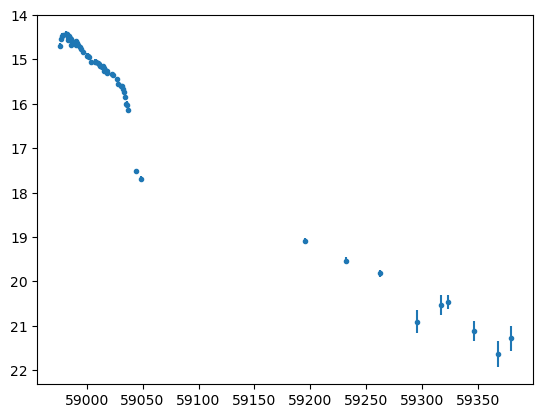

In [12]:
lc(dat_ps1_g)

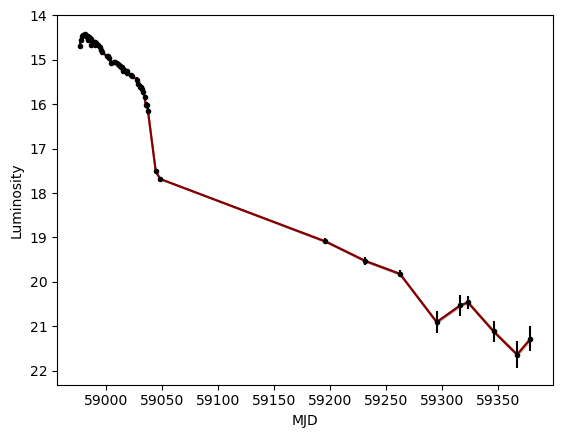

In [13]:
gp(dat_ps1_g)

### PS1.i

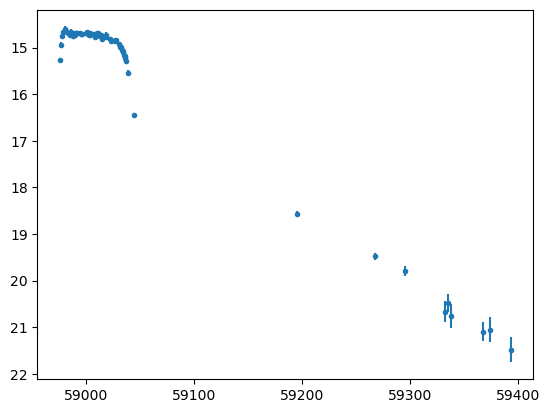

In [14]:
lc(dat_ps1_i)

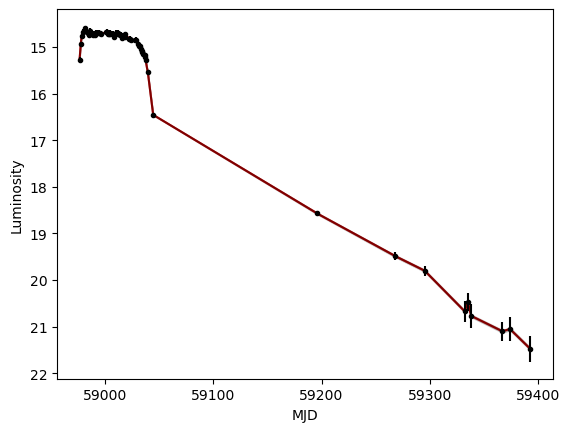

In [15]:
gp(dat_ps1_i)

### PS1.zr

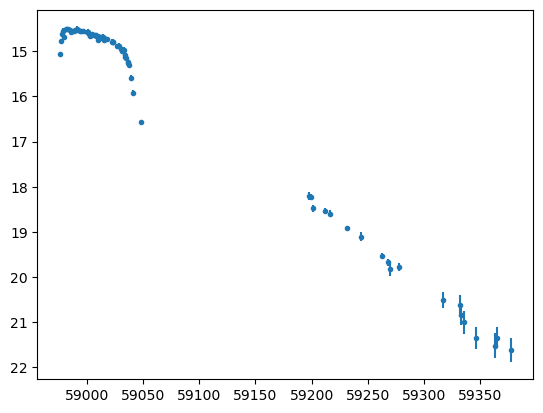

In [17]:
lc(dat_ps1_r)

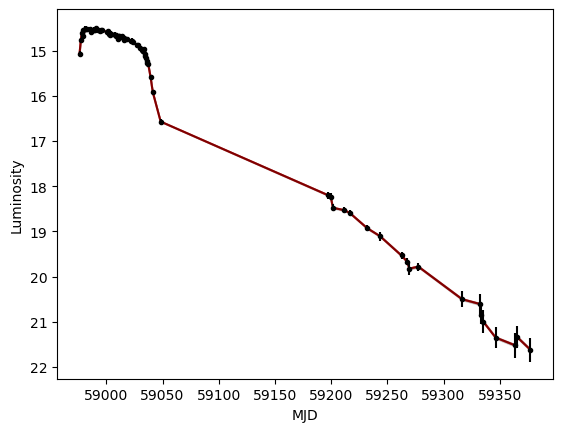

In [18]:
gp(dat_ps1_r)

### PS1.z

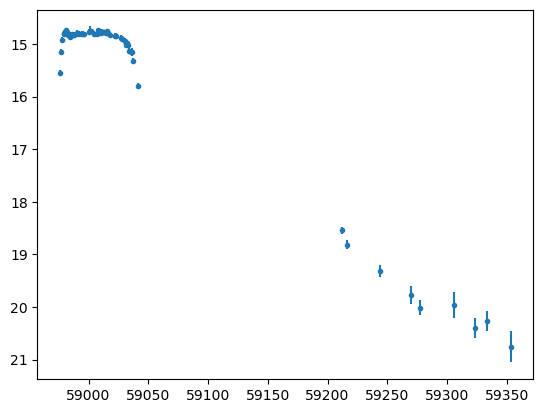

In [19]:
lc(dat_ps1_z)

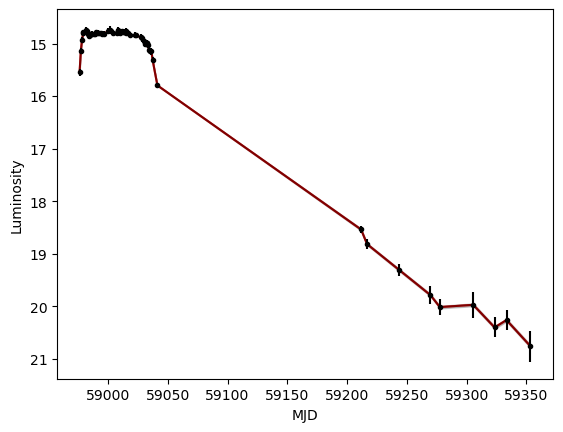

In [20]:
gp(dat_ps1_z)

### ZTF.g

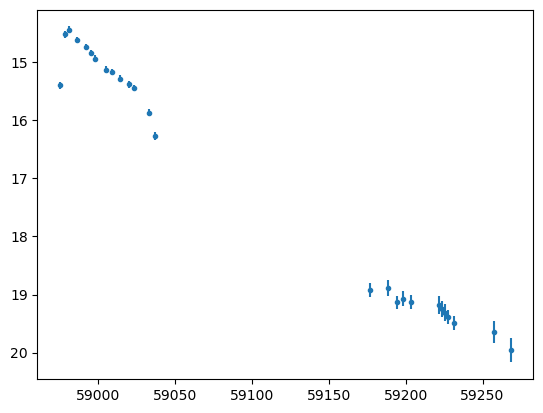

In [21]:
lc(dat_ztfg)

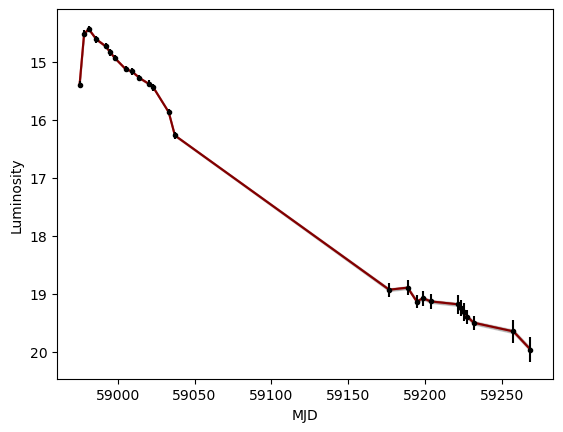

In [22]:
gp(dat_ztfg)

### ZTF.r

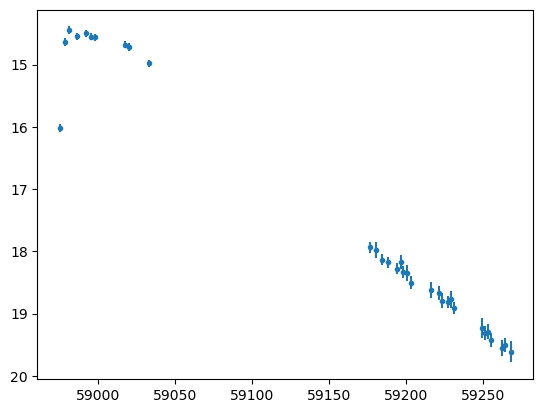

In [23]:
lc(dat_ztfr)

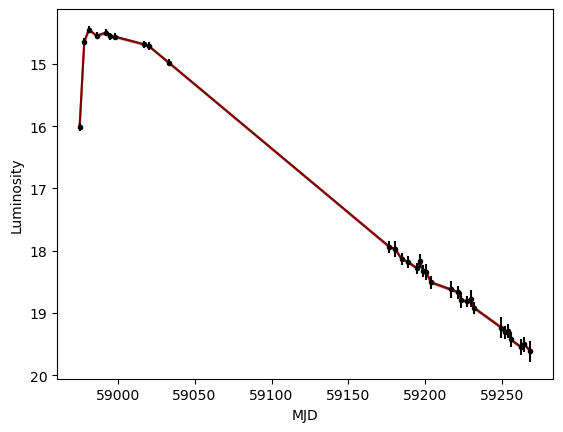

In [24]:
gp(dat_ztfr)

### gprime

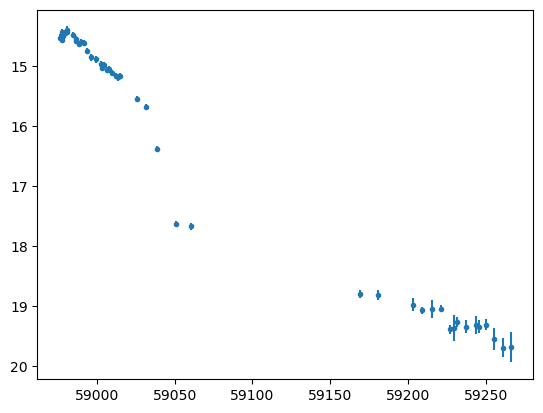

In [25]:
lc(dat_gp)

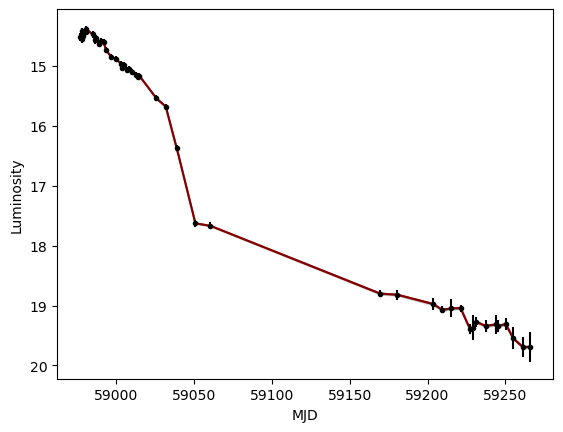

In [26]:
gp(dat_gp)

### iprime

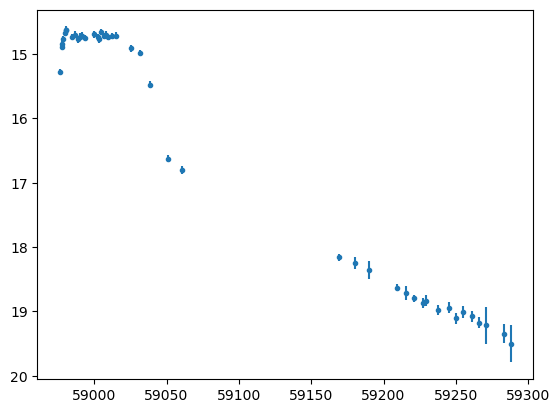

In [27]:
lc(dat_ip)

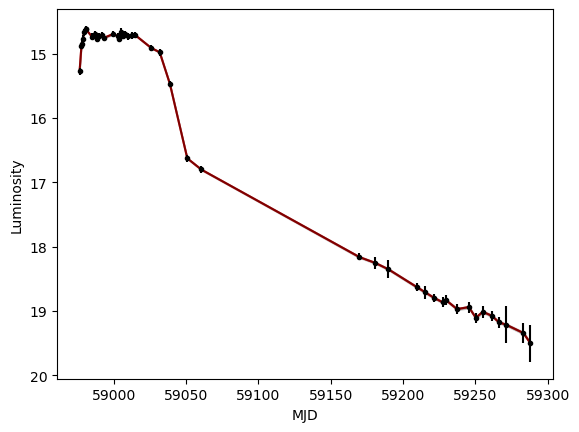

In [28]:
gp(dat_ip)

### rprime

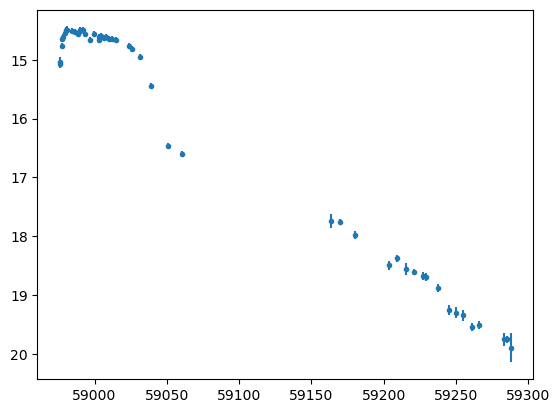

In [29]:
lc(dat_rp)

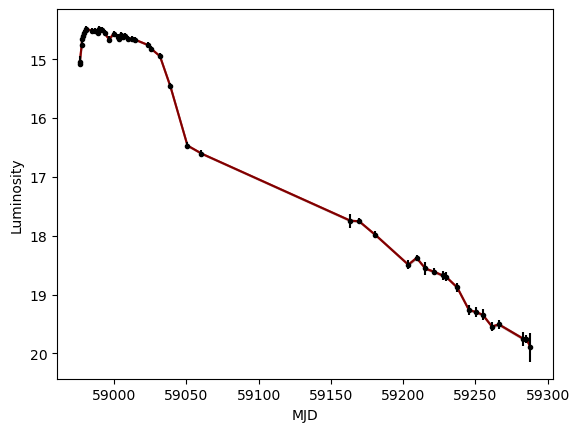

In [30]:
gp(dat_rp)